### Clean sheet Options Trading pour sortir de la misere

# 1) Express goal
# 2) Set directionnality with Price Target (>50% probability to get this price)
# 3) produce what is the market implied curve
# 4) produce what is my forecasted curve


In [2]:
import yfinance as yf
import yahooquery as yq

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import scipy
sns.set_theme()

In [3]:
def price_target(ticker):
    """
    current Target price calculus can be changed
    is the trailingPE and forwardPE geniune ?
    """
    ticker_data = yf.Ticker(ticker)
    df = pd.DataFrame.from_dict(ticker_data.info, orient='index').T   
    current_market_price = df['currentPrice']
    current_pe = df['trailingPE']
    forward_pe = df['forwardPE']
    return current_market_price * (current_pe/forward_pe)

price_target("AAPL")

0    166.091005
dtype: object

In [4]:
appl = yq.Ticker("AAPL", aynchronous=True)


In [5]:
df = appl.option_chain
df

contractSymbol  strike currency  lastPrice  \
symbol expiration optionType                                                    
AAPL   2022-11-25 calls       AAPL221125C00070000    70.0      USD      72.40   
                  calls       AAPL221125C00075000    75.0      USD      75.00   
                  calls       AAPL221125C00085000    85.0      USD      65.02   
                  calls       AAPL221125C00090000    90.0      USD      57.81   
                  calls       AAPL221125C00100000   100.0      USD      50.85   
...                                           ...     ...      ...        ...   
       2025-01-17 puts        AAPL250117P00280000   280.0      USD     133.30   
                  puts        AAPL250117P00285000   285.0      USD     148.91   
                  puts        AAPL250117P00290000   290.0      USD     151.26   
                  puts        AAPL250117P00300000   300.0      USD     163.30   
                  puts        AAPL250117P00310000   310.0      USD     158.70   

                                change  percentChange  openInterest     bid  \
symbol expiration optionType                                                  
AAPL   2022-11-25 calls       0.000000        0.00000             0   78.75   
                  calls       0.000000        0.00000             6   73.50   
                  calls       0.000000        0.00000             1   63.35   
                  calls      -2.989998       -4.91776             2   58.50   
                  calls       0.000000        0.00000           102   48.40   
...                                ...            ...           ...     ...   
       2025-01-17 puts        0.000000        0.00000             0  138.00   
                  puts        0.000000        0.00000             0  134.55   
                  puts        0.000000        0.00000             0  139.55   
                  puts        0.000000        0.00000             0  149.50   
                  puts        0.000000        0.00000             0  159.50   

                                 ask contractSize       lastTradeDate  \
symbol expiration optionType                                            
AAPL   2022-11-25 calls        79.30      REGULAR 2022-10-17 17:44:18   
                  calls        73.75      REGULAR 2022-11-15 19:11:26   
                  calls        63.75      REGULAR 2022-11-17 19:20:39   
                  calls        58.75      REGULAR 2022-11-21 17:28:21   
                  calls        48.80      REGULAR 2022-11-18 17:49:04   
...                              ...          ...                 ...   
       2025-01-17 puts        142.05      REGULAR 2022-10-04 14:31:36   
                  puts        138.40      REGULAR 2022-11-07 14:51:22   
                  puts        143.45      REGULAR 2022-11-08 15:22:47   
                  puts        153.55      REGULAR 2022-11-09 17:01:38   
                  puts        163.60      REGULAR 2022-10-25 14:55:32   

                              impliedVolatility  inTheMoney  volume  
symbol expiration optionType                                         
AAPL   2022-11-25 calls                3.050784        True     0.0  
                  calls                0.000010        True     2.0  
                  calls                0.000010        True     0.0  
                  calls                0.000010        True    15.0  
                  calls                0.500005        True    80.0  
...                                         ...         ...     ...  
       2025-01-17 puts                 0.437017        True     2.0  
                  puts                 0.286262        True     2.0  
                  puts                 0.293159        True     1.0  
                  puts                 0.306648        True     1.0  
                  puts                 0.318244        True    10.0  

[1715 rows x 14 columns]

In [6]:
appl_1125_calls = df.loc[(slice(None),"2022-11-25",'calls'),("impliedVolatility", "strike")]
appl_1125_calls = df.loc[(slice(None),"2025-01-17",'calls'),("impliedVolatility", "strike")]

appl_calls = df.loc[(slice(None),slice(None),'calls'),("impliedVolatility", "strike")]

<AxesSubplot: xlabel='strike'>

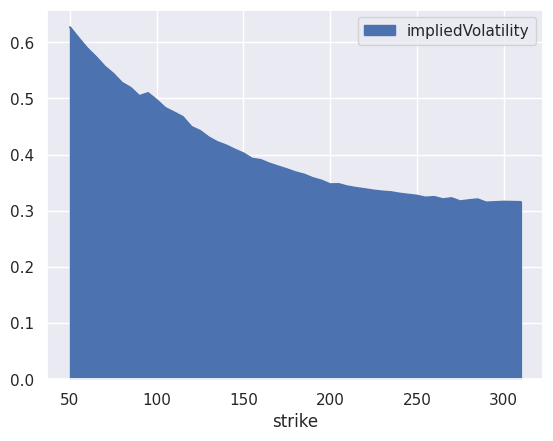

In [7]:
appl_1125_calls.plot(x='strike', y='impliedVolatility', kind='area')

In [8]:
x = df.loc[(slice(None),slice(None),'calls'),("strike")]

x_axis = set(df.loc[(slice(None),slice(None),'calls'),:]['strike'])

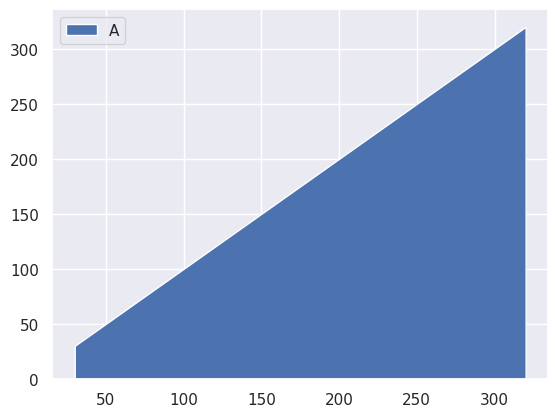

In [9]:
# Plot
plt.stackplot(list(x_axis),list(x_axis), labels=['A','B'])
plt.legend(loc='upper left')
plt.show()


In [10]:
x

symbol  expiration  optionType
AAPL    2022-11-25  calls          70.0
                    calls          75.0
                    calls          85.0
                    calls          90.0
                    calls         100.0
                                  ...  
        2025-01-17  calls         280.0
                    calls         285.0
                    calls         290.0
                    calls         300.0
                    calls         310.0
Name: strike, Length: 886, dtype: float64

In [11]:
x = df.loc[(slice(None),slice(None),'calls'),("strike", "impliedVolatility")]
x = df.loc[(slice(None),"2022-11-25",'calls'),("strike", "impliedVolatility")]
x

strike  impliedVolatility
symbol expiration optionType                           
AAPL   2022-11-25 calls         70.0           3.050784
                  calls         75.0           0.000010
                  calls         85.0           0.000010
                  calls         90.0           0.000010
                  calls        100.0           0.500005
                  calls        105.0           1.308597
                  calls        110.0           0.000010
                  calls        115.0           0.000010
                  calls        120.0           0.000010
                  calls        123.0           0.250007
                  calls        124.0           0.250007
                  calls        125.0           0.000010
                  calls        126.0           0.000010
                  calls        127.0           0.000010
                  calls        128.0           0.000010
                  calls        129.0           0.250007
                  calls        130.0           0.000010
                  calls        131.0           0.000010
                  calls        132.0           0.250007
                  calls        133.0           0.000010
                  calls        134.0           0.000010
                  calls        135.0           0.000010
                  calls        136.0           0.000010
                  calls        137.0           0.000010
                  calls        138.0           0.125009
                  calls        139.0           0.298835
                  calls        140.0           0.125009
                  calls        141.0           0.246101
                  calls        142.0           0.250007
                  calls        143.0           0.276374
                  calls        144.0           0.241219
                  calls        145.0           0.240242
                  calls        146.0           0.237068
                  calls        147.0           0.241463
                  calls        148.0           0.235115
                  calls        149.0           0.237068
                  calls        150.0           0.235115
                  calls        152.5           0.240974
                  calls        155.0           0.244148
                  calls        157.5           0.263679
                  calls        160.0           0.289070
                  calls        162.5           0.324226
                  calls        165.0           0.343757
                  calls        167.5           0.390631
                  calls        170.0           0.429693
                  calls        172.5           0.468755
                  calls        175.0           0.515630
                  calls        177.5           0.515630
                  calls        180.0           0.546880
                  calls        185.0           0.625004
                  calls        190.0           0.687503
                  calls        195.0           0.750003
                  calls        200.0           0.812502
                  calls        205.0           0.875001
                  calls        210.0           0.937501
                  calls        215.0           1.000005
                  calls        220.0           1.062505
                  calls        225.0           1.125004
                  calls        230.0           1.156254
                  calls        250.0           1.375003

In [12]:
y = x.reset_index()
y["impliedVolatility"] = y["impliedVolatility"]*100
y.drop(columns=["symbol", "optionType"], inplace=True)
y

,expiration,strike,impliedVolatility
0,2022-11-25,70.0,305.078362
1,2022-11-25,75.0,0.001000
2,2022-11-25,85.0,0.001000
3,2022-11-25,90.0,0.001000
4,2022-11-25,100.0,50.000500
5,2022-11-25,105.0,130.859721
6,2022-11-25,110.0,0.001000
7,2022-11-25,115.0,0.001000
8,2022-11-25,120.0,0.001000
9,2022-11-25,123.0,25.000750


In [13]:
y_p = y.pivot(index="strike", columns="expiration", values="impliedVolatility")
y_p.fillna(0.0, inplace=True)
y_p

expiration,2022-11-25
strike,
70.0,305.078362
75.0,0.001000
85.0,0.001000
90.0,0.001000
100.0,50.000500
105.0,130.859721
110.0,0.001000
115.0,0.001000
120.0,0.001000


In [14]:
y_m = y_p.stack().reset_index(name="impliedVolatility")
y_m

,strike,expiration,impliedVolatility
0,70.0,2022-11-25,305.078362
1,75.0,2022-11-25,0.001000
2,85.0,2022-11-25,0.001000
3,90.0,2022-11-25,0.001000
4,100.0,2022-11-25,50.000500
5,105.0,2022-11-25,130.859721
6,110.0,2022-11-25,0.001000
7,115.0,2022-11-25,0.001000
8,120.0,2022-11-25,0.001000
9,123.0,2022-11-25,25.000750


<AxesSubplot: xlabel='strike'>

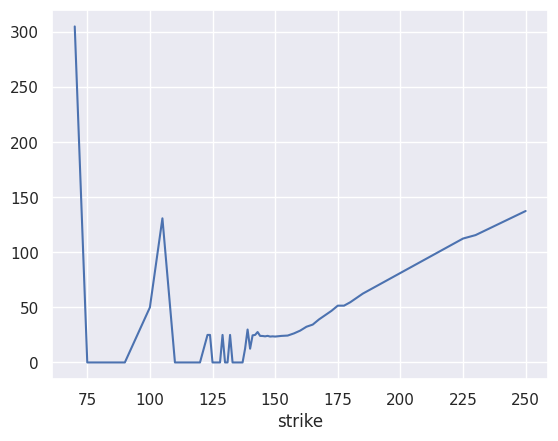

In [15]:
sns.lineplot(y_p, legend=False)


<AxesSubplot: ylabel='Density'>

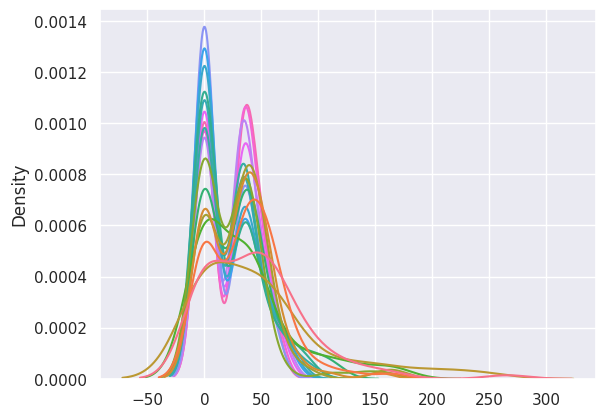

In [245]:
sns.kdeplot(y_p, legend=False)

In [252]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

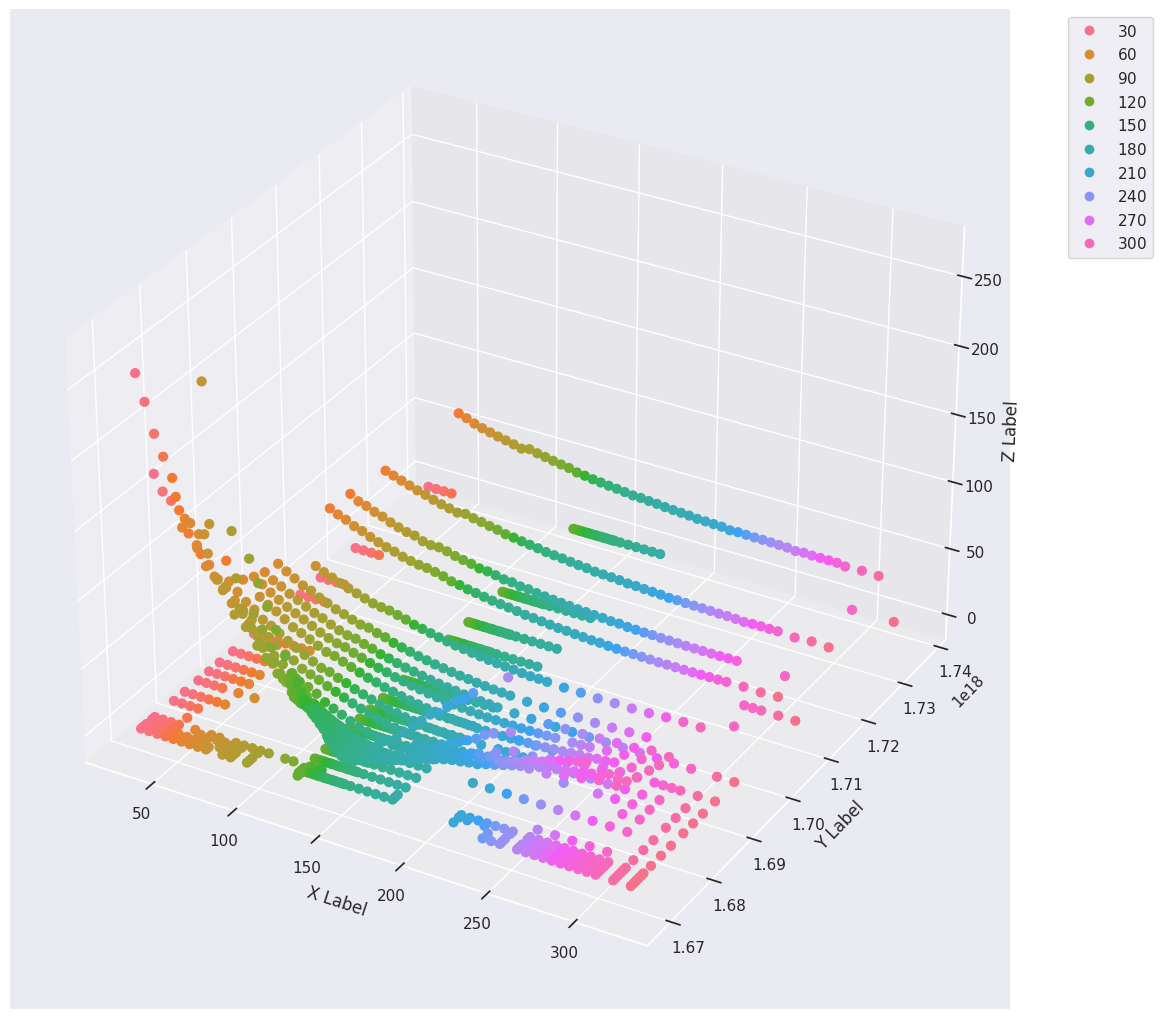

In [295]:
# axes instance
fig = plt.figure(figsize=(10, 10))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

x = y_m["strike"]
y = y_m["expiration"].astype(np.int64)
z = y_m["impliedVolatility"]

# get colormap from seaborn
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

# plot
sc = ax.scatter(x, y, z, s=40, c=x, marker='o', cmap=cmap, alpha=1)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# legend
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

# save
plt.savefig("scatter_hue", bbox_inches='tight')

In [278]:
x = y_m["strike"]
y = y_m["expiration"].values.astype('datetime64[D]')
z = y_m["impliedVolatility"]

In [281]:
z

0         0.000000
1         0.000000
2         0.000000
3       251.953495
4         0.000000
           ...    
1525      0.000000
1526     31.738964
1527      0.000000
1528     31.079791
1529      0.000000
Name: impliedVolatility, Length: 1530, dtype: float64